<a href="https://colab.research.google.com/github/hyojk2001/Python-Based-Data-Analysis/blob/main/0621_mlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # 구글 드라이브 연동하기

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [2]:
# 텐서의 차원과 기본 연산
# 텐서 : int, float 등 다양한 형태를 가진 넘파이 배열

import tensorflow as tf

a = tf.constant(2)
print(tf.rank(a))

b = tf.constant([1,2])
print(tf.rank(b))

c = tf.constant([[1,2],[3,4]])
print(tf.rank(c))

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [3]:
# 즉시 실행모드를 통한 연산

import tensorflow as tf
import numpy as np

a = tf.constant(3)
b = tf.constant(2)

# 기본 연산, 텐서 형태로 출력
print(tf.add(a,b))
print(tf.subtract(a,b))
print(tf.multiply(a,b).numpy())
print(tf.divide(a,b).numpy())

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
6
1.5


In [4]:
# tf.function

import tensorflow as tf

@tf.function
def square_pos(x):
  if x > 0:
    x = x * x
  else:
    x = x * -1
  return x

print(square_pos(tf.constant(2)))

tf.Tensor(4, shape=(), dtype=int32)


In [5]:
# OR 게이트의 구현

import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

tf.random.set_seed(777)

x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[1]])

# 모델 구성
model = Sequential()
# 단층 퍼셉트론 구성
model.add(Dense(1, input_shape=(2,), activation='linear'))    # Dense 층은 퍼셉트론을 자동으로 생성

# 모델 준비
model.compile(optimizer=SGD(),
              loss=mse,
              metrics=['acc'])

# 학습시키기
model.fit(x,y,epochs=500)

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 1.4290 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 1.3602 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 1.2956 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 1.2349 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 1.1779 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 1.1242 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 1.0738 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 1.0264 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 0.9819 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 0.9399 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 0.9005 -

In [6]:
model.get_weights()

[array([[0.49431452],
        [0.37552655]], dtype=float32), array([0.3271933], dtype=float32)]

In [7]:
# 벡터의 내적

import tensorflow as tf

x = tf.random.uniform((10,5))
print(x)
w = tf.random.uniform((5,3))
print(w)
d = tf.matmul(x,w)           # (10,5) * (5,3)

print(f'x와 w의 벡터 내적의 결과 크기 : {d.shape}')

tf.Tensor(
[[0.42134905 0.7339295  0.6891215  0.11031473 0.7368126 ]
 [0.08253932 0.367424   0.37523293 0.04468763 0.66309917]
 [0.4308219  0.1118592  0.03488064 0.29159796 0.07450032]
 [0.63849115 0.8799385  0.30752933 0.17975795 0.37052894]
 [0.9804722  0.5882423  0.6023251  0.08644116 0.67989504]
 [0.8296001  0.663954   0.31144035 0.65895545 0.7005327 ]
 [0.06563807 0.8794203  0.22005117 0.3261572  0.83251977]
 [0.1417427  0.73404145 0.0670954  0.46878767 0.33431995]
 [0.28359926 0.3282429  0.5036017  0.15093148 0.14607835]
 [0.9141097  0.9964664  0.79642034 0.62247396 0.14526713]], shape=(10, 5), dtype=float32)
tf.Tensor(
[[0.909613   0.34968376 0.39626384]
 [0.6574153  0.60619414 0.70691717]
 [0.26103103 0.36348212 0.1026212 ]
 [0.57476664 0.8922577  0.6070466 ]
 [0.32122958 0.8106562  0.14686322]], shape=(5, 3), dtype=float32)
x와 w의 벡터 내적의 결과 크기 : (10, 3)


In [8]:
# XOR 게이트 구현 + 다층 퍼셉트론

import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import mse

tf.random.set_seed(777)

x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[0]])

# 모델 구성
model = Sequential()
model.add(Dense(32, input_shape=(2,), activation='relu'))
# 다층 퍼셉트론 구성
model.add(Dense(1, activation='sigmoid'))

# 모델 준비
model.compile(optimizer=RMSprop(),
              loss=mse,
              metrics=['acc'])

# 학습시키기
model.fit(x,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 348ms/step - loss: 0.2646 - acc: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2621 - acc: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2603 - acc: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2589 - acc: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2578 - acc: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2568 - acc: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2558 - acc: 0.2500
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2550 - acc: 0.2500
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2541 - acc: 0.2500
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2533 - acc: 0.2500
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.25

In [9]:
# MNIST 데이터셋 다운받기

from tensorflow.keras.datasets.mnist import load_data

# 텐서플로우 저장소에서 데이터 다운받기
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

In [10]:
# 학습 데이터
print(x_train.shape, y_train.shape)
print(y_train)

# 테스트 데이터
print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


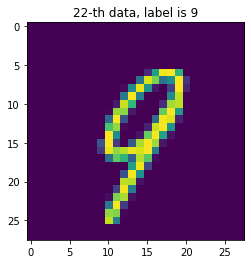

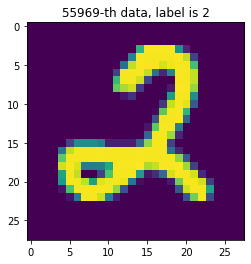

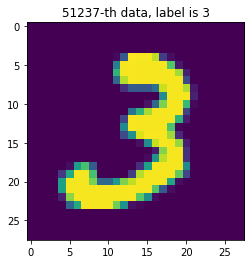

In [11]:
# 데이터 그려보기

import matplotlib.pyplot as plt
import numpy as np

sample_size = 3
# 0 ~ 59999의 범위에서 무작위로 3개의 정수 뽑기
random_idx = np.random.randint(60000,size = sample_size)

for idx in random_idx:
  img = x_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d' % (idx,label))

In [12]:
# 검증 데이터 만들기

from sklearn.model_selection import train_test_split

x_train, x_val,y_train, y_val = train_test_split(x_train,y_train, test_size=0.3, random_state=777)

print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'훈련 데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (42000, 28, 28) 레이블 (42000,)
훈련 데이터 (18000, 28, 28) 레이블 (18000,)


In [13]:
# 모델 입력을 위한 데이터 전처리

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28*28))) / 255
x_val = (x_val.reshape((num_x_val, 28*28))) / 255
x_test = (x_test.reshape((num_x_test, 28*28))) / 255

print(x_train.shape)    # 모델 입력으 ㄹ위해 데이터를 784차원으로 변경

# 신경망은 입력 데이터의 스케일에 매우 민감하므로 적절한 전처리과정이 필수이다.

(42000, 784)


In [14]:
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 784차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫번째 Dense 층
model.add(Dense(64, activation='relu', input_shape=(784, )))
model.add(Dense(32, activation='relu'))       # 32개의 출력을 가지는 Dense 층
model.add(Dense(10, activation='softmax'))    # 10개의 출력을 가지는 신경망

In [17]:
def softmax(arr):
  m = np.max(arr)
  arr = arr - m   # exp의 오버플로우 방지
  arr = np.exp(arr)
  return arr / np.sum(arr)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

case1 = np.array([3.1, 3.0, 2.9])
case2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3)  # numpy의 소수점 제한
print(f'sigmoid {sigmoid(case1)}, softmax {softmax(case1)}')
print(f'sigmoid {sigmoid(case2)}, softmax {softmax(case2)}')

sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [19]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 4ms/step - loss: 0.5201 - acc: 0.8490 - val_loss: 0.2579 - val_acc: 0.9307
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2143 - acc: 0.9391 - val_loss: 0.1935 - val_acc: 0.9458
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1631 - acc: 0.9531 - val_loss: 0.1635 - val_acc: 0.9527
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1321 - acc: 0.9615 - val_loss: 0.1397 - val_acc: 0.9586
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1108 - acc: 0.9677 - val_loss: 0.1329 - val_acc: 0.9607
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0943 - acc: 0.9719 - val_loss: 0.1232 - val_acc: 0.9641
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0812 - acc: 0.9758 - val_loss: 0.1191 - val_acc: 0.9651
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

In [20]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [21]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

In [28]:
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label='train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label='train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label='val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


In [26]:
# 학습된 모델을 통해 값을 예측
import numpy as np

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision=7)    # 소수점 제한
print(f'각 클래스에 속할 확률 : \n{results [0]}')

(10000, 10)
각 클래스에 속할 확률 : 
[5.1849892e-14 2.8582188e-13 6.0253864e-09 2.4140420e-10 1.0350819e-16
 1.6609695e-13 5.0156811e-20 1.0000000e+00 1.6875637e-13 5.0232863e-11]


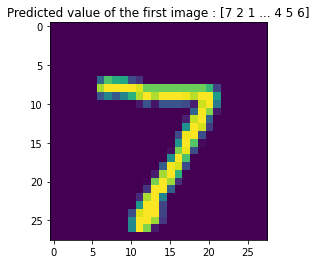

In [30]:
# 예측값 그려서 확인

import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1)   # 가장 큰 값의 인덱스를 가져오기
plt.imshow(x_test[0].reshape(28,28))
plt.title('Predicted value of the first image : ' + str(arg_results))
plt.show()

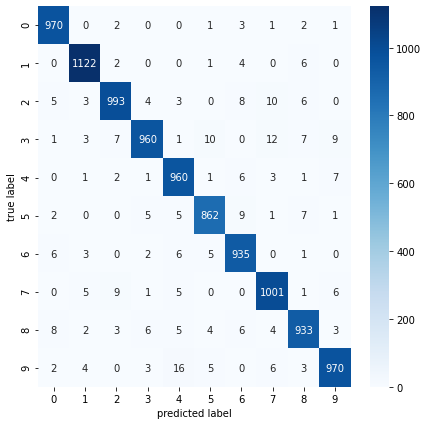

In [31]:
# 모델 평가방법 1 : 혼동행렬
# sklearn.metrics 모듈은 여러 평가지표에 관련된 기능 제공
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동행렬 만들기
plt.figure(figsize=(7,7))
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(results, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()